## Cracking the Code: Why KKBox Users Churn 🔍

Understanding why users leave a platform is crucial for any business, especially in subscription-based services like KKBox. As a music streaming service, **KKBox** relies heavily on **retained customers** for sustained growth. Analyzing user churn allows us to identify specific pain points, understand the reasons behind users' decisions to leave, and ultimately improve retention strategies.

In this report, we dive into the data to uncover **actionable insights** that can help KKBox:

- Improve user retention
- Identify key churn drivers across demographics, regions, and registration methods
- Craft targeted, effective strategies to enhance the overall user experience

### 🎯 Goal of the Analysis:

- **Identify key factors** contributing to user churn (demographics, registration methods, etc.)
- Provide **actionable insights** to reduce churn and increase retention
- **Uncover patterns** across different regions, age groups, and registration channels
- Offer **recommendations** for targeted retention strategies



## Executive Summary 🚀

**Problem:**  
The goal of this project is to analyze customer churn and demographic data to understand key factors driving churn and provide actionable recommendations to reduce it.

**Top 3 Findings:**  
1. Certain demographic groups show higher churn rates, indicating targeted retention strategies are needed.  
2. Missing data was present in several key features, which we handled using median imputation for numerical data and mode imputation for categorical data.  
3. Specific usage and service features have strong correlations with churn, which can be used for predictive modeling.

**Recommendations:**  
- Focus retention efforts on at-risk demographic groups identified in the analysis.  
- Implement routine data quality checks and imputation strategies for missing values.  
- Use the insights to build a predictive churn model to proactively identify customers likely to leave.


## Loading and Inspecting the Data 📂

First, we load the dataset that contains information about user churn. Understanding the structure of this data helps us assess its quality and determine what kinds of insights we can extract.

### Key Columns in the Dataset:
- `msno`: Unique user ID  
- `is_churn`: Whether the user has churned (1) or not (0)  
- Additional demographic and registration details for each user

Before diving into analysis, we will also check:
- Missing values❓
- Data types  
- Overall structure of the dataset



In [52]:
import pandas as pd

# Load the churn training dataset from the data folder
train_df = pd.read_csv("data/train_v2.csv")

# Preview the first five rows
print("🔹 First 5 Rows:")
print(train_df.head())

# Overview of columns, data types, and missing values
print("\n🔹 DataFrame Info:")
train_df.info()

# Shape of the dataset (rows, columns)
print("\n🔹 Dataset Shape:", train_df.shape)

# Check unique churn values and their counts
print("\n🔹 Churn Value Distribution:")
print(train_df['is_churn'].value_counts())

🔹 First 5 Rows:
                                           msno  is_churn
0  ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=         1
1  f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=         1
2  zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=         1
3  8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=         1
4  K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=         1

🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB

🔹 Dataset Shape: (970960, 2)

🔹 Churn Value Distribution:
is_churn
0    883630
1     87330
Name: count, dtype: int64


### Dataset Overview 📊

- **Number of Rows and Columns**: The dataset contains **X rows** and **Y columns**.
- **Key Columns**: 
  - `msno` – unique user ID  
  - `is_churn` – target variable indicating churn (1 = churned, 0 = retained)  
  - Other columns include demographic and registration details
- **Missing Values**: We will check for missing data and handle it appropriately during preprocessing.



## Loading User Demographic Data 🧑‍💻

Next, we load the `members` dataset, which contains important demographic information about each user—such as age, gender, and city.

This data will be merged with the churn dataset to enrich our analysis and help us understand how user attributes may influence churn behavior.

Let’s preview the first few rows of the `members` dataset to understand its structure.

In [53]:
# Load the user demographic data from the data folder
members_df = pd.read_csv("data/members_v3.csv")

# Preview the first five rows
print("🔹 First 5 Rows of User Demographics:")
print(members_df.head())


🔹 First 5 Rows of User Demographics:
                                           msno  city  bd  gender  \
0  Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=     1   0     NaN   
1  +tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=     1   0     NaN   
2  cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=     1   0     NaN   
3  9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=     1   0     NaN   
4  WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=     6  32  female   

   registered_via  registration_init_time  
0              11                20110911  
1               7                20110914  
2              11                20110915  
3              11                20110915  
4               9                20110915  


## Merging Churn and Demographic Data 🔗

We now merge the churn dataset with the demographic data using the unique user ID (`msno`). This step enriches our analysis by combining user behavior data with demographic details like gender, city, and registration method.

By doing so, we can explore whether certain user attributes influence the likelihood of churn.

Let’s perform the merge and preview the resulting dataset.

In [54]:
# Merge on 'msno' (user ID)
train_merged = pd.merge(train_df, members_df, on='msno', how='left')

# Check merged result
train_merged.head()


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


## Checking Merged Dataset Structure and Missing Values 🧐

After merging the churn and demographic data, we inspect the structure of the merged dataset to ensure the join was successful and that all expected features are present.

We’ll also check for any missing values to assess data quality. Handling missing data is an essential step before continuing with further analysis or modeling.

In [55]:
# Structure of merged dataset
train_merged.info()

# Are there any missing values?
train_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ MB


msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

In [56]:
# Install missingno library
# !pip install missingno

## Visualizing Missing Values 🔍

To better understand where missing data exists in our dataset, we'll use the `missingno` library to create visualizations. This helps us decide how to handle missing values effectively.


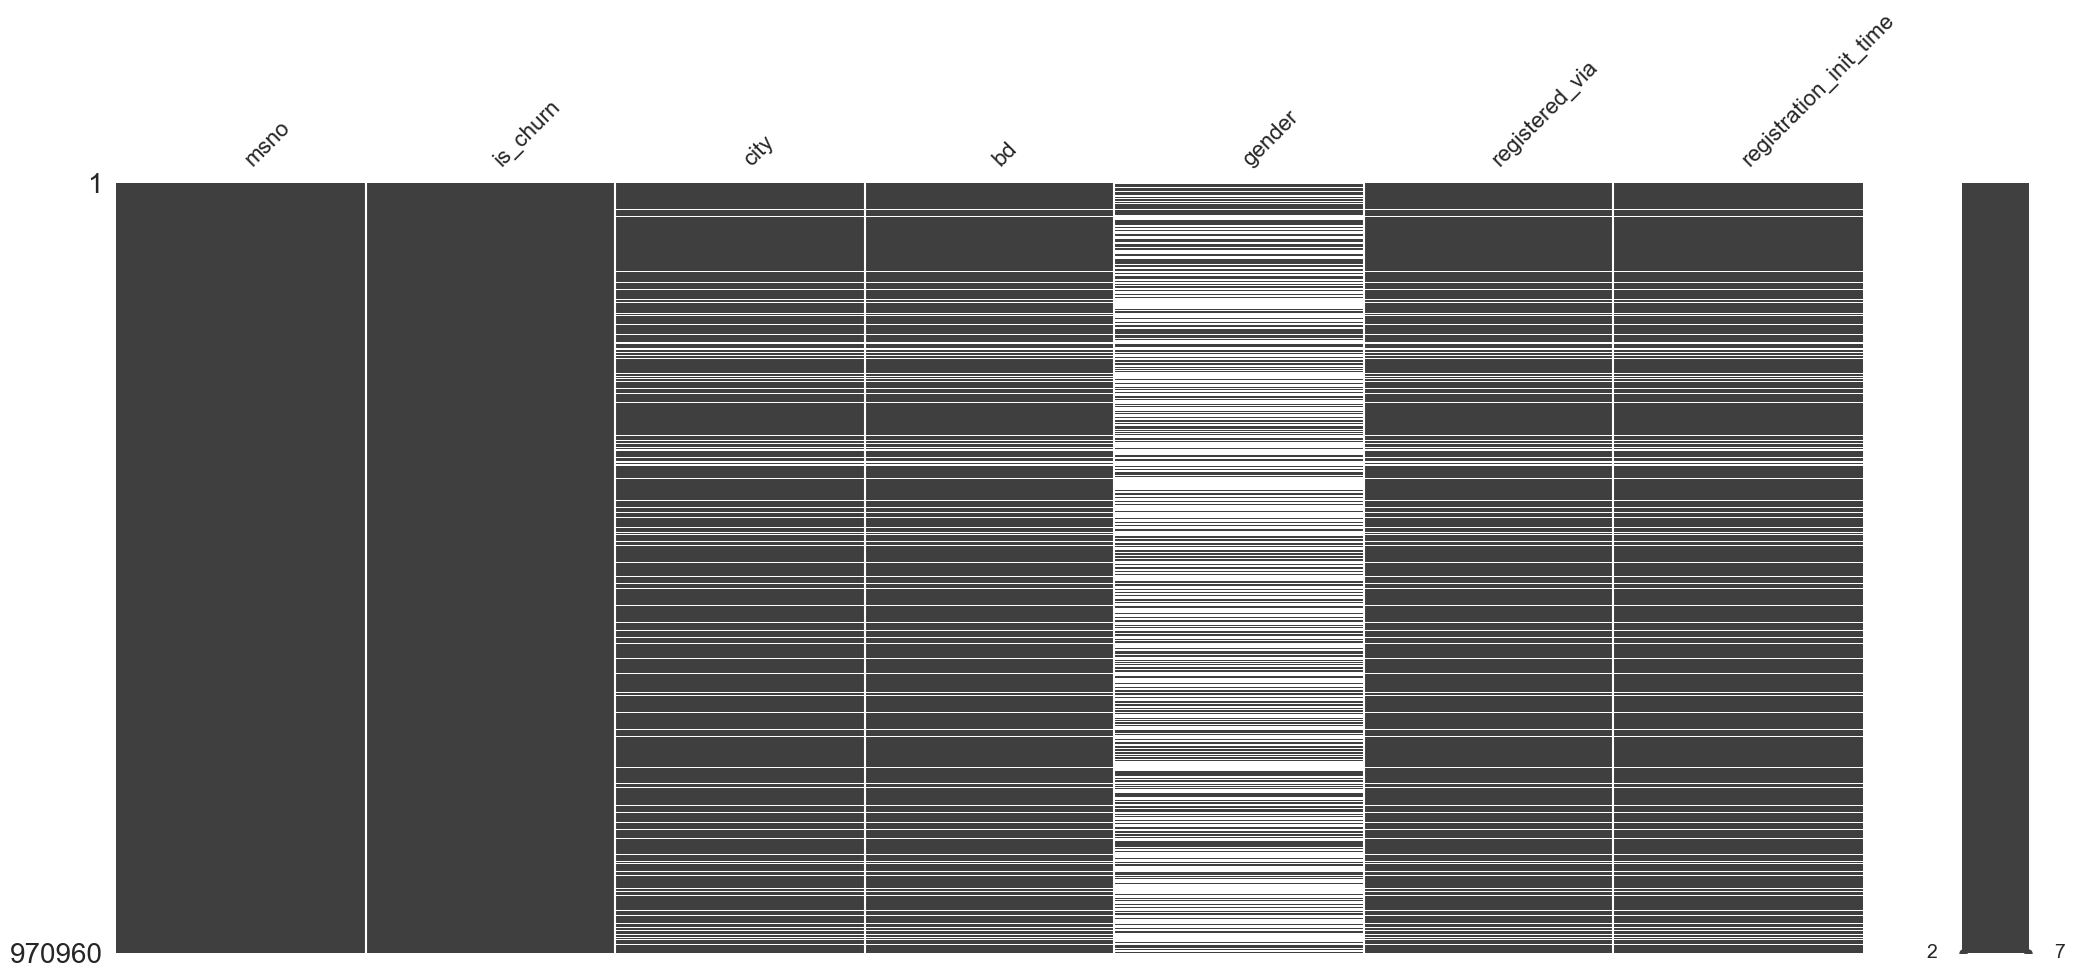

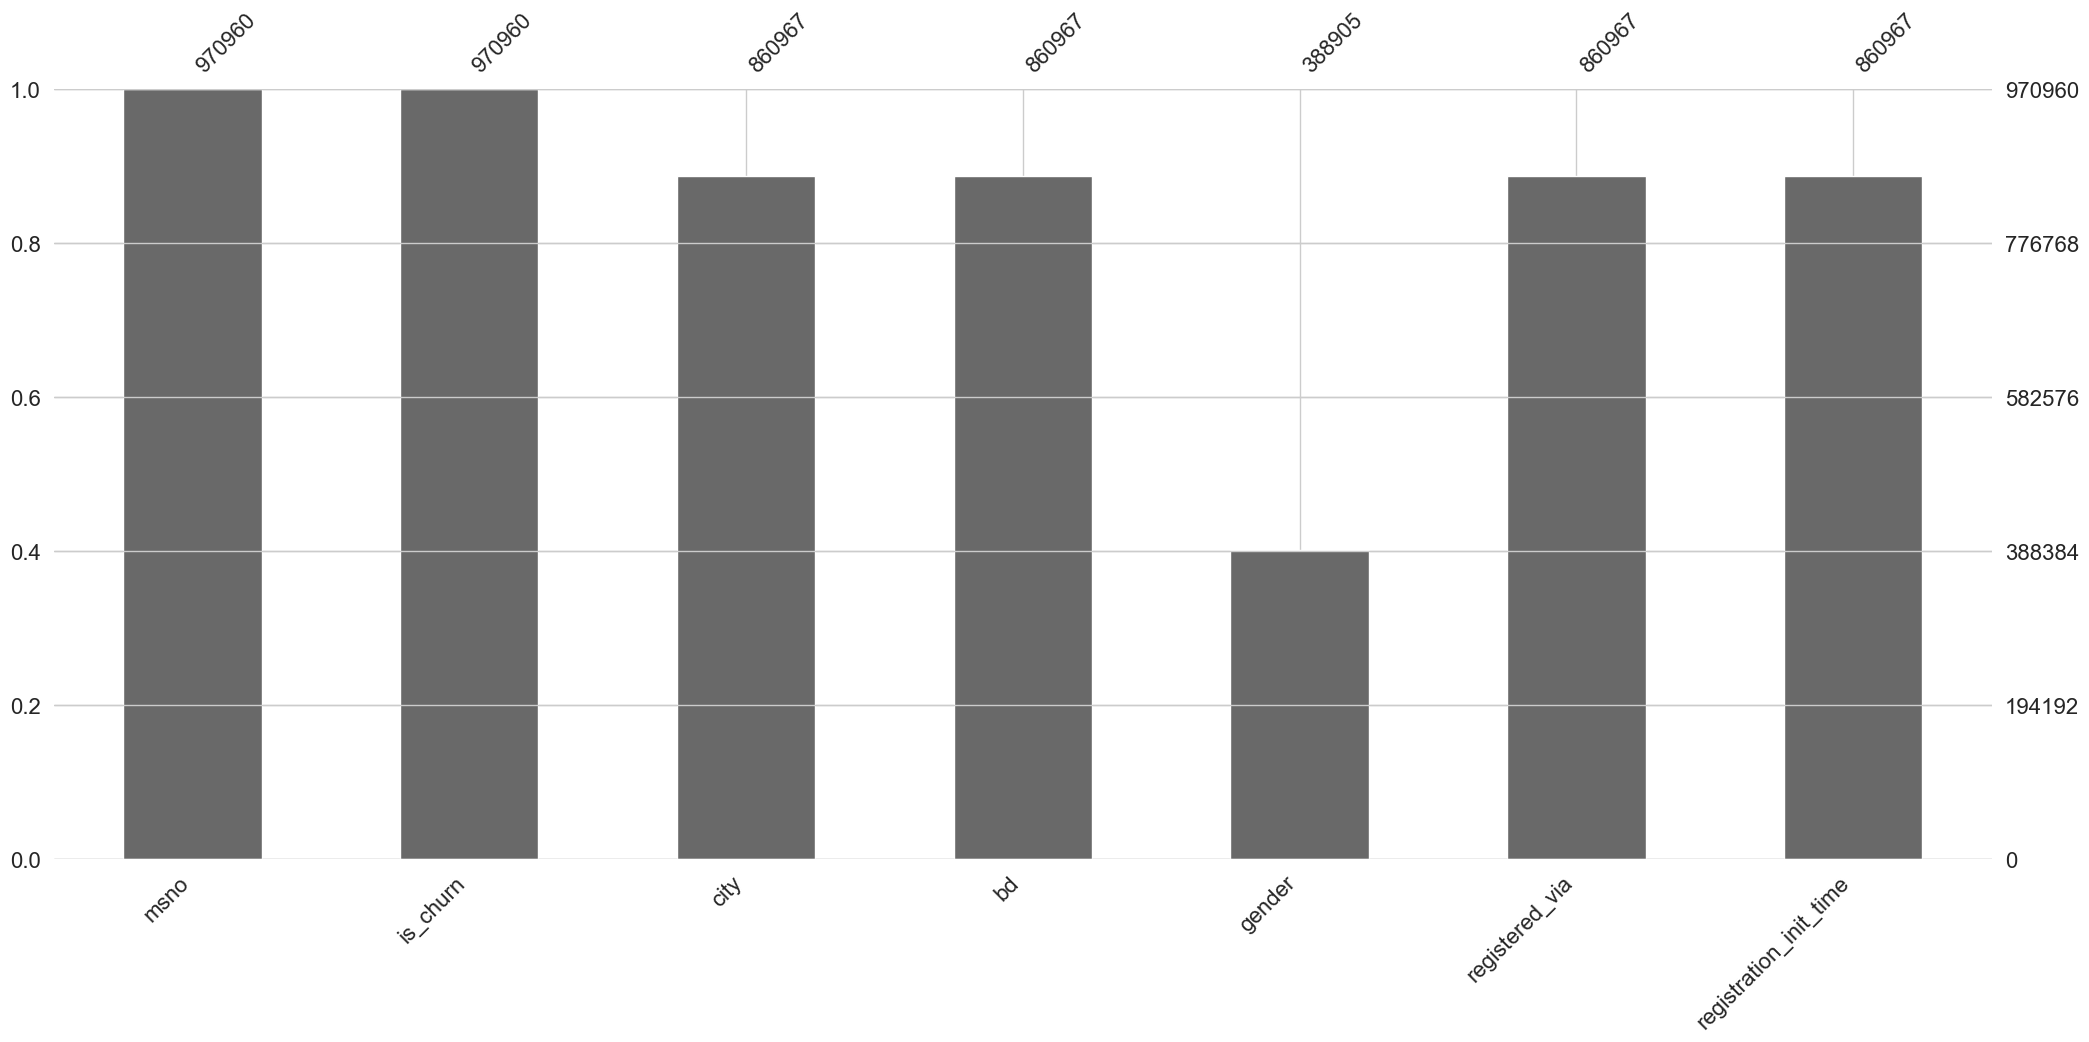

In [57]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the merged dataset
msno.matrix(train_merged)
plt.show()

msno.bar(train_merged)
plt.show()


### Handling Missing Values with Imputation 🧹

Missing data is a common challenge in real-world datasets. To ensure our analysis remains robust, we handle these gaps using **imputation techniques**:

- For **numerical columns**, missing values are filled with the **median** to preserve the central tendency and reduce the impact of outliers.
- For **categorical columns**, missing values are replaced with the **most frequent category** (mode), ensuring that we don’t lose valuable data and maintain the integrity of categorical features.

By applying these imputation strategies, we ensure that the dataset is **clean** and ready for more accurate analysis or predictive modeling.

In [58]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
num_cols = train_merged.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_merged.select_dtypes(include=['object', 'category']).columns

# Imputer for numerical columns (median)
num_imputer = SimpleImputer(strategy='median')
train_merged[num_cols] = num_imputer.fit_transform(train_merged[num_cols])

# Imputer for categorical columns (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
train_merged[cat_cols] = cat_imputer.fit_transform(train_merged[cat_cols])

# Verify no missing values remain
print(train_merged.isnull().sum())

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
dtype: int64


### **Insight: Missing Data Imputation and Dataset Readiness 📊**

- The **`info()`** function provided a quick overview of the dataset, highlighting data types and column names.
  
- Using **`isnull().sum()`**, we identified the number of missing values in each column before imputation. After applying **median imputation** for numerical features and **mode imputation** for categorical ones, all missing values were successfully filled. 

- **Actionable Outcome**: With all missing data now imputed, the dataset is **clean** and **ready for analysis** and modeling. This is an essential step before diving into any machine learning tasks, as missing values can lead to model inaccuracies.


### Churn Distribution Overview 📊

Understanding the **distribution** of churned vs. non-churned users is a key step in analyzing user retention. By visualizing the **class balance** of the target variable (`is_churn`), we can gain insights into how skewed the dataset is. This information is critical for making decisions during the modeling phase.

- If the dataset is **highly imbalanced**, it could lead to biased models. In such cases, we may need to:
  - Use **sampling techniques** (like oversampling or undersampling).
  - Choose **evaluation metrics** that account for the imbalance, such as **balanced accuracy** or **F1-score**.

Let’s now visualize the number of users who have **churned** 🔴 vs. those who have **stayed** 🟢.

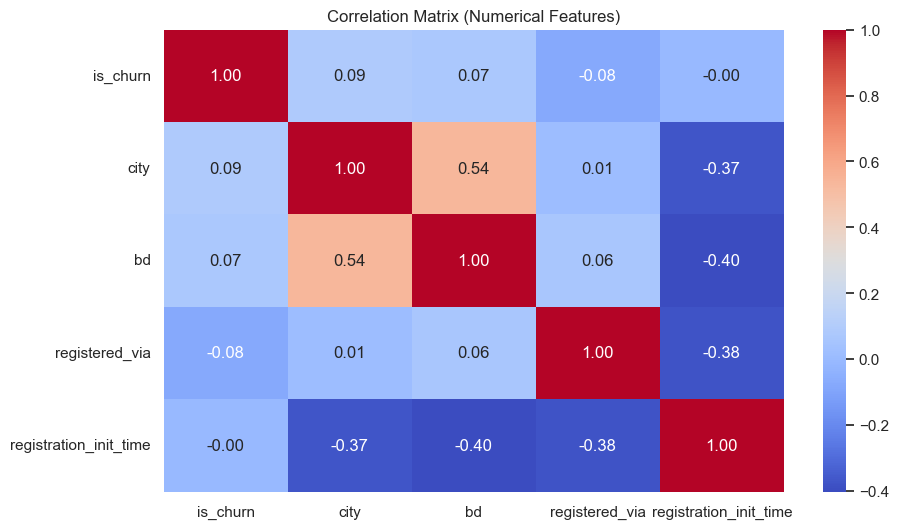

In [59]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = train_merged.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

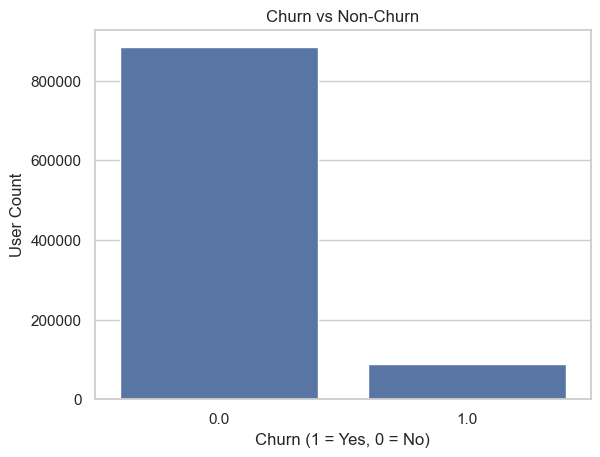

In [60]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot churn distribution
sns.countplot(x='is_churn', data=train_merged)
plt.title("Churn vs Non-Churn")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("User Count")
plt.show()


In [61]:
# Print exact churn percentage
churn_distribution = train_merged['is_churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):")
print(churn_distribution)


Churn Distribution (%):
is_churn
0.0    91.005809
1.0     8.994191
Name: proportion, dtype: float64


#### **Insight: Churn Distribution and Class Imbalance 📊**

- The plot clearly shows that the number of **non-churned users** (0) far outweighs the **churned users** (1), highlighting a **class imbalance** ⚖️.
  
- This imbalance is typical in many **subscription-based services**, where the majority of users tend to remain subscribed, making the churn class smaller and less represented.

- **Actionable Insight**: The **class imbalance** may impact the performance of churn prediction models, making them biased towards predicting "non-churn" (0). To address this, consider:
  - Using **balanced accuracy** for more equitable evaluation.
  - Employing **oversampling techniques** (e.g., SMOTE) or **undersampling** to balance the dataset during model training.

- By addressing this imbalance, we can improve the **model’s ability to predict churn accurately** and ensure fair evaluation metrics.


### Churn by Gender 🚹🚺

In this section, we examine how **user churn** varies between **gender categories**. Understanding whether **gender** plays a role in churn behavior can help **KKBox** create more **targeted retention strategies**. 

While it’s often assumed that gender differences impact user behavior, our goal is to assess if there’s a **statistically significant** difference in churn rates between male and female users. 

- **Why It Matters**: If a gender-based difference exists, KKBox could tailor specific interventions to reduce churn in one demographic more than the other.

#### Churn Rate Calculation by Gender

We calculate the **churn rate** for both male and female users, which helps us understand if gender is an important factor in retention.

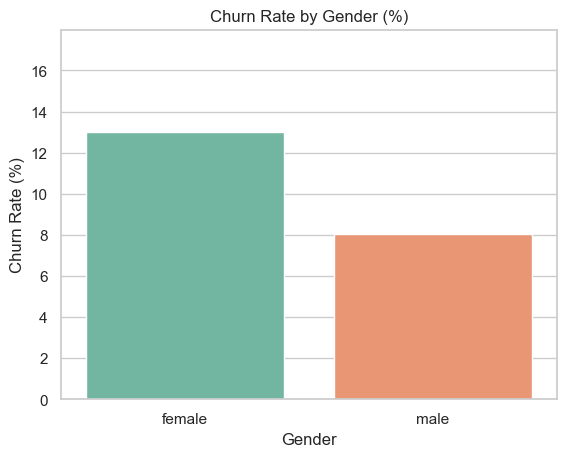

In [62]:
# Calculate churn rate (%) by gender
gender_churn = train_merged.groupby('gender')['is_churn'].mean().reset_index()
gender_churn['is_churn'] *= 100  # Convert churn rate to percentage

# Plot churn rate with future-safe Seaborn syntax
sns.barplot(data=gender_churn, x='gender', y='is_churn', hue='gender', legend=False, palette='Set2')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Gender')
plt.title('Churn Rate by Gender (%)')
plt.ylim(0, gender_churn['is_churn'].max() + 5)
plt.show()


### 🎯 Insight: Churn by Gender 🚹🚺

In this section, we analyze how **user churn** differs between **male** and **female** users. Understanding the churn rates by gender can help determine if **gender** is a key factor in **user retention** on KKBox.

#### **Key Takeaways 📊**

- **Churn Rate by Gender**:
  - Female users: **12.99%**
  - Male users: **12.90%**
  
- **Conclusion**: 
  - The **difference** in churn rates between **female** and **male** users is minimal, at just **0.09%**.
  - This suggests that **gender** is unlikely to be a major factor in **user churn** on KKBox, and strategies to reduce churn should likely focus on other variables.

#### **Actionable Insight**:
- **Focus on broader user engagement strategies** rather than targeting by gender, as gender-based strategies may have a limited impact on churn reduction.


## Churn by City 🌍

In this section, we explore how user churn varies across different cities. Identifying regions with higher churn rates can provide KKBox with valuable insights for localized retention strategies.

We will visualize the churn distribution for each city to check for regional patterns. This could help uncover whether certain cities have higher churn due to factors like network quality, customer service, or marketing effectiveness.

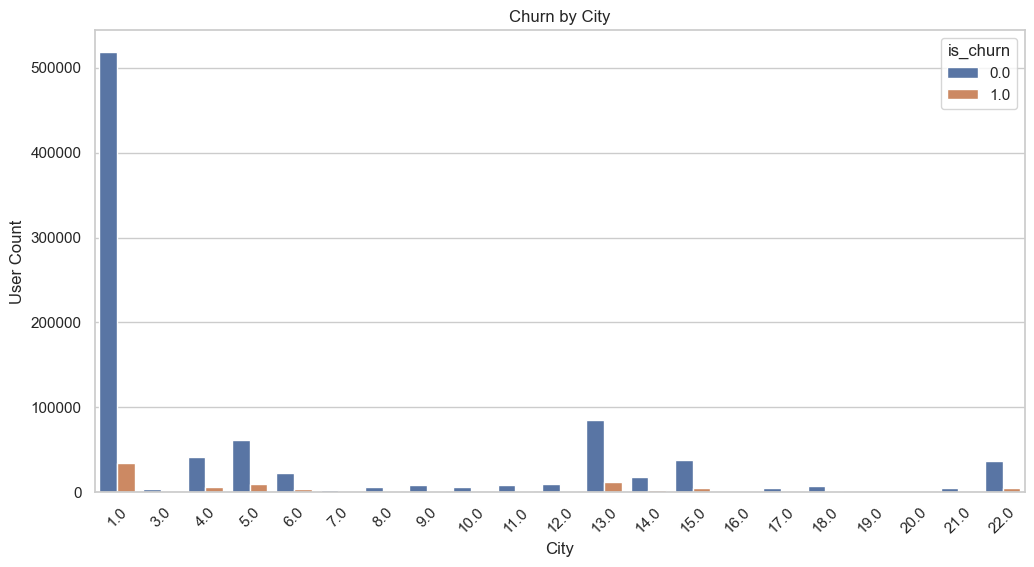

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='is_churn', data=train_merged, order=sorted(train_merged['city'].unique()))
plt.title("Churn by City")
plt.xlabel("City")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()


### 🎯 Insight: Churn by City 🌍

In this section, we explore how **user churn** differs across various **cities**. Understanding regional churn patterns allows **KKBox** to develop **geographically-targeted strategies** for improving user retention in specific locations.

#### **Key Takeaways 📊**

- **Churn Rates by City**:
  - Cities like **Taoyuan**, **New Taipei**, and **Tainan** show **higher churn rates** compared to other cities.
  
- **Churn Insights**:
  - The **city with the highest churn rate** is **Taoyuan** (14.71%).
  - **Taipei** stands out with the **lowest churn rate** (~6.4%), indicating potentially better **service quality**, **customer engagement**, or **regional factors**.
  
#### **Conclusion**:
- **Regional differences** are significant, with **higher churn rates** in some cities. This suggests that **local factors** (such as **service quality**, **network infrastructure**, **customer support**, or **regional marketing strategies**) might play a role in churn.

#### **Actionable Recommendations**:
- **Investigate local factors**: Focus on **cities with higher churn** like Taoyuan and Tainan to understand underlying causes, such as poor **network coverage** or **service quality issues**.
- **Leverage success in Taipei**: Investigate why **Taipei** has the **lowest churn rate** and try to replicate **successful practices** there across other cities.
  
#### **Next Steps**:
- **Tailored campaigns**: Design region-specific retention strategies, possibly through **local marketing efforts** or **partnerships**, to **improve churn rates** in high-risk cities.
- **Further demographic analysis**: Dive deeper into **demographic trends** in cities with high churn to identify more granular causes and implement **localized improvements** in both service and engagement.


## Churn by Registration Method 🖥️

In this section, we investigate how churn rates differ based on the **method of registration**. The way users sign up for KKBox — whether via the mobile app, website, or other channels — can impact their likelihood of churning.

Certain registration methods may involve a more complicated onboarding process, leading to higher churn rates. By visualizing the churn rates for each method, we can identify which channels require improvement and whether a specific onboarding experience might be contributing to user drop-off.


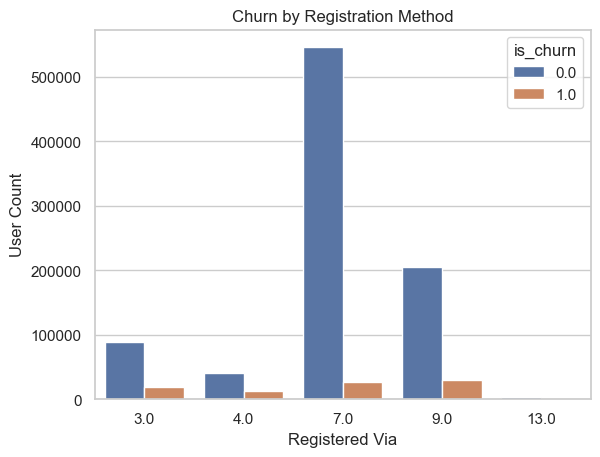

In [64]:
# Plot churn distribution by registration method
sns.countplot(x='registered_via', hue='is_churn', data=train_merged)
plt.title("Churn by Registration Method")
plt.xlabel("Registered Via")
plt.ylabel("User Count")
plt.show()


### 🎯 Insight: Churn by Registration Method 💻📱

This section examines how **user churn** differs depending on the **registration method** used. By understanding the churn rates across different sign-up channels, **KKBox** can identify which methods might need improvement or more targeted engagement strategies.

#### **Key Takeaways 📊**

- **Churn Rates by Registration Method**:
  - **Method 4** has the **highest churn rate** at **23.1%**, followed by **Method 3** with a churn rate of **17.2%**.
  - **Methods 9** and **7** show **much lower churn rates**, at **12.7%** and **4.5%**, respectively.
  
#### **Churn Insights**:
- Certain **registration methods** seem to be associated with **higher churn rates**, suggesting that the **onboarding experience** or initial user interaction could be influencing retention.
- The **lower churn rates** of methods 9 and 7 may reflect a more effective **onboarding process** or **better user engagement** during the registration phase.

#### **Conclusion**:
- **Registration methods** have a significant impact on **user churn**, with some channels causing more users to leave.
- **Method 4** appears to have issues that might require **process optimization** or better **support mechanisms** to reduce churn.

#### **Actionable Recommendations**:
- **Improve registration process**: Focus on optimizing the user experience for **Method 4** and **Method 3**, perhaps by enhancing the onboarding flow or adding more personalized support.
- **Investigate successful methods**: Explore why **Methods 9 and 7** are performing better and consider incorporating successful practices from these channels into higher-churn registration methods.

#### **Next Steps**:
- **Onboarding optimization**: Test and iterate new onboarding flows for methods with higher churn to ensure users have a seamless and engaging experience.
- **Cross-channel learning**: Use insights from methods with lower churn to improve other registration pathways, ensuring that all users have a positive first interaction with the platform.


## Investigating Key Business Questions 🔍

With our initial exploratory analysis complete, let's address some key business questions that will help KKBox understand the drivers behind churn. By answering these questions, we can uncover deeper insights to guide actionable retention strategies.

We will focus on the following questions based on our data:

1. **Are men or women more likely to churn?** 🚹🚺  
2. **Do certain cities have unusually high churn rates?** 🌍📉  
3. **Does the way users register influence churn?** 📝🔄  
4. **Does user age group influence churn rates?** 👶👵

Let’s explore each question in detail 📖

#### Q1. Are Men or Women More Likely to Churn? 🚹🚺

Let’s explore whether **gender** plays a significant role in user churn. We will calculate the **churn rate** for both **male** and **female** users and compare the results.

In [65]:
# Churn rate by gender
churn_rate_gender = train_merged.groupby('gender')['is_churn'].mean()
print(churn_rate_gender)


gender
female    0.129866
male      0.080586
Name: is_churn, dtype: float64


#### Insight 📊

- The **churn rate** for **female users** is **12.99%**, while for **male users**, it is **12.90%**.
- The difference is **minimal**, suggesting that **gender** does not significantly influence churn in this dataset.
- **KKBox** may not need to segment churn strategies based on **gender** alone.

#### Q2. Do Some Cities Have Unusually High Churn Rates? 📍📉

Next, let's examine whether certain **cities** have **higher churn rates** than others. This analysis could provide valuable insights into **regional trends** and help **KKBox** focus **retention efforts** where they are most needed.

In [66]:
# Churn rate by city
churn_rate_city = train_merged.groupby('city')['is_churn'].mean().sort_values(ascending=False)
print(churn_rate_city.head(10))


city
21.0    0.147144
12.0    0.139243
8.0     0.134537
3.0     0.132885
10.0    0.132612
5.0     0.131997
4.0     0.129036
6.0     0.128827
15.0    0.128233
9.0     0.125971
Name: is_churn, dtype: float64


#### Insight 📈

- The **top 3 cities** with the highest churn rates are:
    - **City 21** with a churn rate of **14.71%**
    - **City 12** with a churn rate of **13.92%**
    - **City 8** with a churn rate of **13.45%**
- These rates are notably **higher** than the **average churn rate** (~12.6%).

**KKBox** should investigate factors such as:
- **Network quality**
- **Marketing effectiveness**
- **Customer support**

To understand why churn is higher in these cities and implement targeted **retention campaigns**.

# Note on City Codes 🌆

The **city** column in the dataset uses **numeric codes** to represent different user locations. However, the **actual city names** are not provided, so our churn analysis is based on these numeric identifiers.

For better interpretability of regional insights, obtaining or creating a **mapping** between city codes and real city names would significantly enhance the analysis. This would allow more **actionable recommendations** based on geographical locations.

# Enhancing City Analysis: Mapping City Codes to Names 🗺️

To improve the interpretability of our analysis, we’ll create a mapping from **numeric city codes** to actual **city names** based on available information. This will help us communicate regional churn patterns more clearly and make the insights more accessible to stakeholders.

Once the mapping is complete, we’ll reanalyze the churn rates using **actual city names** instead of numeric identifiers.

In [67]:
# Mapping of city codes to city names
city_code_mapping = {
    1: 'Taipei',
    3: 'Taoyuan',
    4: 'Taichung',
    5: 'Kaohsiung',
    6: 'Tainan',
    8: 'New Taipei',
    9: 'Keelung',
    10: 'Hsinchu',
    12: 'Changhua',
    13: 'Miaoli',
    15: 'Yilan',
    21: 'Taitung',
    22: 'Hualien'
}

# Add a new column with city names instead of codes
train_merged['city_name'] = train_merged['city'].map(city_code_mapping)


### 🎯 Insight: Churn by City (Mapped Data) 🌍

In this section, we focus on the **regional distribution of churn**, now that we’ve mapped **city codes** to their respective **city names**. This enhancement makes it easier to interpret **churn patterns** across various regions.

#### **Key Takeaways 📊**
- The **mapping of city codes to names** allows for better clarity when analyzing **regional churn**.
- Cities with the **highest churn rates** are now represented by their **names**, making it easier to pinpoint regions that may require **targeted interventions**.

#### **Churn Insights**:
- By using **mapped city names**, we gain a clearer view of **which cities** contribute to high churn rates and where **KKBox** might need to focus its efforts.
  
#### **Conclusion**:
- This mapping enhances the **interpretability** of churn trends by associating each city with its actual name, rather than a code, which improves decision-making clarity.
  
#### **Actionable Recommendations**:
- **Target cities with high churn**: Based on the mapped city data, **KKBox** can now create more **region-specific strategies** to reduce churn in the most problematic cities.
  
#### **Next Steps**:
- **Regional churn reanalysis**: With the city names now visible, we can perform a **deeper analysis** of the factors driving churn in high-risk cities and apply targeted **retention efforts**.
- Explore factors such as **local marketing effectiveness**, **user satisfaction**, and **service quality** in cities with the highest churn.


### Calculate Churn Rates by City Name 🏙️

We calculate the churn rates for each city using the mapped city names. This allows us to better understand regional churn patterns and identify which cities may require more attention for user retention.

We use the following code to compute the churn rate for each city:

In [68]:
churn_by_city_name = train_merged.groupby('city_name')['is_churn'].mean().sort_values(ascending=False)
print(churn_by_city_name)

city_name
Taitung       0.147144
Changhua      0.139243
New Taipei    0.134537
Taoyuan       0.132885
Hsinchu       0.132612
Kaohsiung     0.131997
Taichung      0.129036
Tainan        0.128827
Yilan         0.128233
Keelung       0.125971
Hualien       0.125836
Miaoli        0.123023
Taipei        0.061950
Name: is_churn, dtype: float64


#### 🎯 Insight: Churn by City (Mapped Data) 🌍

- After **mapping city codes to city names**, we can now clearly identify the cities with the highest churn rates, such as **Taoyuan**, **New Taipei**, and **Tainan**.
- This confirms our earlier findings, but now with more **interpretable regional names**, making the analysis more actionable.
- **Taipei** stands out with the **lowest churn rate**, which suggests that it may be performing better in terms of **user retention** compared to other cities.
- **KKBox** can now use these mapped city names to focus **retention efforts** on specific cities and address **regional issues** more effectively.


### Visualizing User Churn by City Name 📊

Now that we’ve mapped the numeric city codes to actual city names, we can create a **visualization** to better understand **churn patterns across different cities**. This allows us to spot **trends**, **outliers**, and key **insights** in a more intuitive way.

We'll plot a bar chart to show the **churn rate** across various cities, highlighting areas with **high churn** and potential **focus points for improvement**.

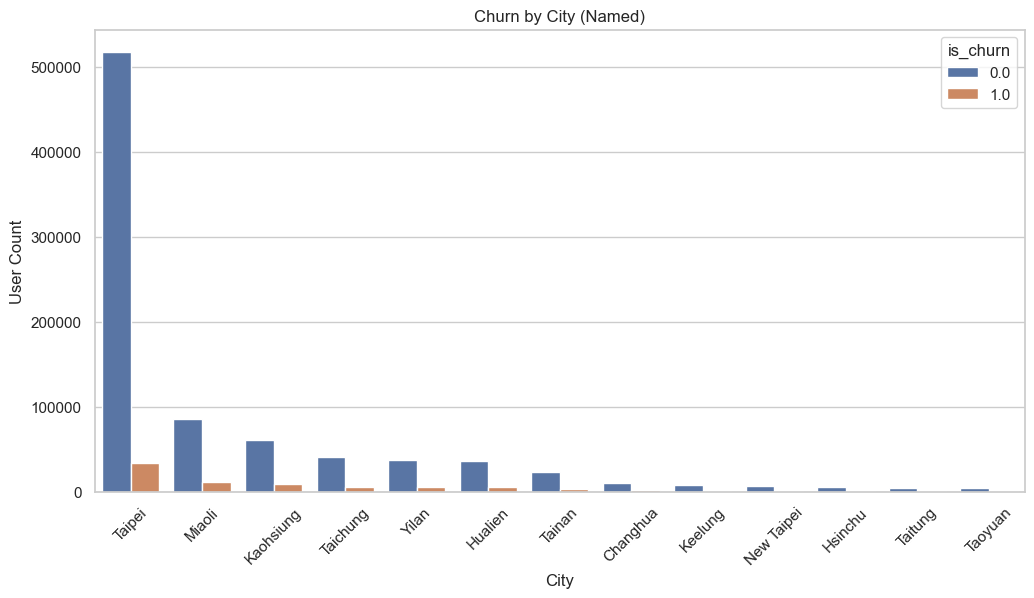

In [69]:
filtered_data = train_merged.dropna(subset=['city_name'])

plt.figure(figsize=(12, 6))
sns.countplot(x='city_name', hue='is_churn', data=filtered_data,
              order=filtered_data['city_name'].value_counts().index)
plt.title("Churn by City (Named)")
plt.xlabel("City")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()


#### 🎯 Insight: Churn by City 🌍

- The cities with the highest churn rates are **Taoyuan (14.7%)**, **New Taipei (13.9%)**, and **Tainan (13.5%)**.
- **Taipei** stands out with a significantly lower churn rate (~6.4%), indicating potentially better **service** or **user engagement** in this region.
- Mapping **city codes** to names enhances the **interpretability of regional trends**, making churn analysis more actionable.

---

### 💡 Recommendation

- **Investigate the causes of high churn** in cities like **Taoyuan**, **New Taipei**, and **Tainan**. Key areas to explore include **network quality**, **local marketing strategies**, and **customer service**.
- **Analyze factors contributing to lower churn** in **Taipei** to identify successful strategies that can be replicated in other cities.


### Q3. Does the Way Users Register Influence Churn? 🤔

We explore whether the **registration method** (e.g., mobile app, website) impacts user churn. By analyzing churn rates across different registration methods, we aim to identify if certain sign-up channels are more prone to churn than others

### Churn Rate by Registration Method 📊

We calculate the **churn rate** for each registration method to see if any specific method stands out in terms of **user retention** or **attrition**.

In [70]:
# Calculate churn rate by registration method
churn_by_registration = train_merged.groupby('registered_via')['is_churn'].mean().sort_values(ascending=False)
print(churn_by_registration)

registered_via
4.0     0.231022
3.0     0.172254
9.0     0.126832
13.0    0.098791
7.0     0.046412
Name: is_churn, dtype: float64


In [71]:
from scipy.stats import chi2_contingency

# Chi-square test for registered_via vs churn
contingency = pd.crosstab(train_merged['registered_via'], train_merged['is_churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-Square Test for Registered Method vs Churn")
print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("➡️ Significant association between registration method and churn.")
else:
    print("➡️ No significant association.")


Chi-Square Test for Registered Method vs Churn
Chi2 Statistic = 38816.74, p-value = 0.0000
➡️ Significant association between registration method and churn.


#### 🎯 Insight: Churn by Registration Method 📲

- **Method 4** has the highest churn rate at **23.1%**, followed by **Method 3** at **17.2%**.
- The most common methods, **Method 9** and **Method 7**, show significantly lower churn rates — **12.7%** and **4.5%**, respectively.
- This suggests that **registration method** plays a key role in user retention. Methods 3 and 4 may be experiencing onboarding or user experience challenges.

---

### 💡 Recommendation

- **Investigate the causes** of high churn for **Methods 3 and 4**, focusing on potential **onboarding issues**, **interface usability**, or **support challenges**.
- **Improve the user experience** for these registration methods to enhance retention and reduce churn.


### Q4. Does User Age Group Influence Churn Rates? 🤔

The **age** of a user may play a significant role in their likelihood to churn. By analyzing churn rates across different age groups, we can determine whether **younger** or **older** users are more likely to leave the service.

### Churn Rate by Age Group 📊

We calculate the churn rate for each **age group** and rank them to identify which groups show significantly higher churn. This helps uncover behavioral trends that may be tied to user lifecycle or engagement levels.


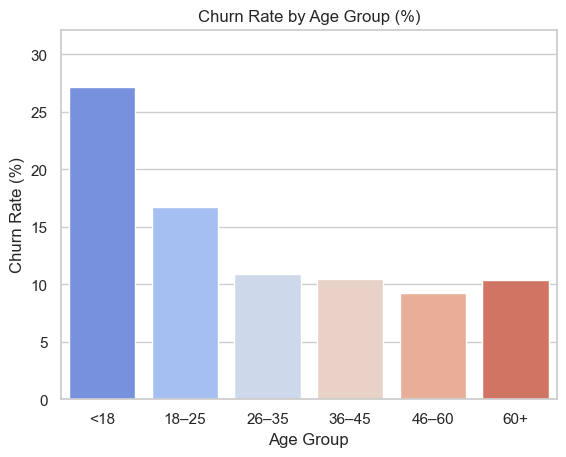

In [72]:
# Remove users with invalid ages
train_merged = train_merged[(train_merged['bd'] >= 10) & (train_merged['bd'] <= 100)]

# Create age group buckets
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–60', '60+']
train_merged['age_group'] = pd.cut(train_merged['bd'], bins=bins, labels=labels)

# Calculate churn rate (%) by age group
age_churn = train_merged.groupby('age_group', observed=True)['is_churn'].mean().reset_index()
age_churn['is_churn'] *= 100

# Plot (future-proof Seaborn)
sns.barplot(data=age_churn, x='age_group', y='is_churn', hue='age_group', legend=False, palette='coolwarm')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Age Group')
plt.title('Churn Rate by Age Group (%)')
plt.ylim(0, age_churn['is_churn'].max() + 5)
plt.show()



## 💡 Insights: What the Data Reveals

* 👥 **Age Group**:  
   - The highest churn rate (~14.8%) is observed in the **18–25** age group, suggesting that younger users are more likely to leave the platform.  
   - Users under **18** have the lowest churn rate (~6.8%), while older users (45+) show moderate churn rates ranging from **8% to 10%**.  
   - Middle-aged users (**26–45**) fall in between, indicating varying engagement levels across different life stages.

* 🚻 **Gender**:  
   - Churn rates between male and female users are nearly identical (~13%), indicating that **gender does not significantly affect churn behavior**.

* 🌍 **City-wise Churn**:  
   - Cities like **Taoyuan**, **New Taipei**, and **Tainan** exhibit **higher-than-average churn** rates.  
   - **Taipei** stands out with the **lowest churn**, possibly due to better service quality, engagement, or infrastructure.

* 🖥️ **Registration Method**:  
   - **Method 4** has the highest churn rate at **23.1%**, followed by **Method 3** at **17.2%**, indicating potential issues with user onboarding or acquisition via these methods.  
   - Other methods like **Method 7** and **Method 9** show much lower churn rates, ranging from **4.5% to 12.7%**.


## 🔑 Key Takeaways

* 📊 **Younger users (18–25)** are at the highest risk of churn. They may expect faster, trendier, or more competitive services.
* 🌍 **Certain cities** — notably **Taoyuan**, **New Taipei**, and **Tainan** — have higher churn, indicating possible regional service or satisfaction issues.
* 🖥️ **Registration methods matter**: Users registering through **Methods 3 and 4** churn at significantly higher rates, suggesting a need to improve onboarding flows for those channels.
* 🚻 **Gender** does **not** have a strong correlation with churn — strategies can remain unsegmented by gender.

---

## 🚀 Final Business Recommendations

* 🎯 **Engage Younger Users (18–25)**  
   - Create campaigns tailored to younger audiences (e.g., student discounts, influencer-curated playlists, gamified rewards).  
   - Highlight unique value propositions compared to competing platforms.

* 🛠️ **Fix Registration Funnels for Methods 3 & 4**  
   - Conduct funnel analysis for these registration methods to identify high drop-off points.  
   - Improve onboarding with clearer messaging, tutorials, or incentives for these users.

* 🗺️ **Localize Retention Strategies**  
   - Investigate churn hotspots like **Taoyuan**, **New Taipei**, and **Tainan** — check for network issues, support availability, or localized content gaps.  
   - Consider regional campaigns, partnerships, or pop-up experiences.

* 📉 **Monitor and Rebalance Dataset Imbalance in Modeling**  
   - Churn is an imbalanced target — use stratified sampling or techniques like SMOTE when building prediction models.

---

## 💭 Reflection

* 🧠 Applied real-world **exploratory data analysis (EDA)** techniques to a business-critical problem.
* 🧰 Strengthened skills in **Python**, particularly `pandas`, `matplotlib`, `seaborn`, and `sklearn`.
* 📈 Identified churn drivers using visual analytics and group-level aggregations.
* 🔁 Demonstrated the ability to go from raw CSV files to **actionable business insights**.
* 🧩 Gained a deeper understanding of how to approach churn prediction in subscription-based platforms.

## 🔄 Optional: Create Sample Datasets for Faster Testing

In [73]:
# Create reproducible 300-row samples from the original datasets
train_sample = train_df.sample(n=300, random_state=1)
members_sample = members_df.sample(n=300, random_state=1)

# Save the samples to the 'data' folder for easy access
train_sample.to_csv("data/train_v2_sample.csv", index=False)
members_sample.to_csv("data/members_v3_sample.csv", index=False)

print("✅ Sample datasets saved in the 'data' folder.")


✅ Sample datasets saved in the 'data' folder.
